# Import Modules

In [23]:
import os, sys
import pandas as pd
import numpy as np
import datetime as dt
from pprint import pprint
import csv
import itertools as it
from prettytable import PrettyTable
# from nanrms import *
# from handover import *
# from mask import *
import matplotlib.pylab as plt
import seaborn as sns

pdir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # for jupyter-notebook
sys.path.insert(1, pdir)
from myutils import *

%config InlineBackend.figure_format = 'retina'  # 提高 jupyter notebook 的圖形顯示解析度
# plt.style.use('ggplot')

pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 200)

datadir = "/Users/jackbedford/Desktop/MOXA/Code/data"
exp = "_Bandlock_Udp_B1_B3_B7_B8_RM500Q"
devices = [
    'qc00',
    'qc01',
    'qc02',
    'qc03',
]
schemes = [
    'B1',
    'B3',
    'B7',
    'B8',
]
dates = {
    "2023-03-15": [*['#{:02d}'.format(i+1) for i in range(1, 4)], '#06'],
    "2023-03-16": ['#{:02d}'.format(i+1) for i in range(16)],
}

# Collect Data Files

In [24]:
def set_data(df):
    df['seq'] = df['seq'].astype('Int32')
    df['rpkg'] = df['rpkg'].astype('Int8')
    df['frame_id'] = df['frame_id'].astype('Int32')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['xmit_time'] = pd.to_datetime(df['xmit_time'])
    df['arr_time'] = pd.to_datetime(df['arr_time'])
    df['Timestamp_epoch'] = df['Timestamp_epoch'].astype('float32')
    df['xmit_time_epoch'] = df['xmit_time_epoch'].astype('float32')
    df['arr_time_epoch'] = df['arr_time_epoch'].astype('float32')
    df['lost'] = df['lost'].astype('boolean')
    df['excl'] = df['excl'].astype('boolean')
    df['latency'] = df['latency'].astype('float32')
    return df

## Uplink

In [25]:
i = -1
dfs_ul = []
for date, traces in dates.items():
    for trace in traces:
        i += 1
        if i in [16,17,18,19]:
            dfs_ul.append([pd.DataFrame()]*len(devices))
            continue
        dfs_ul.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_uplk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_ul[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_ul[i][j] = dfs_ul[i][j][(dfs_ul[i][j]['seq'] >= st) & (dfs_ul[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_ul))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc00/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc01/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc02/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc03/#02/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc00/#03/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc01/#03/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc02/#03/data/udp_uplk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-15/_Bandlock_Udp_B1_B3_B7_B8_RM50

## Downlink

In [26]:
i = -1
dfs_dl = []
for date, traces in dates.items():
    for trace in traces:
        i += 1
        if i in [0,1,2,3]:
            dfs_dl.append([pd.DataFrame()]*len(devices))
            continue
        dfs_dl.append([])
        st, et = [], []
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            data = os.path.join(datadir, date, exp, dev, trace, 'data', 'udp_dnlk_loss_latency.csv')
            print(data, os.path.isfile(data))
            # print(i, j)
            df = pd.read_csv(data)
            df = set_data(df)
            dfs_dl[i].append(df.copy())
            st.append(df['seq'].array[0])
            et.append(df['seq'].array[-1])
        st, et = max(st), min(et)
        for j, (dev, schm) in enumerate(zip(devices, schemes)):
            dfs_dl[i][j] = dfs_dl[i][j][(dfs_dl[i][j]['seq'] >= st) & (dfs_dl[i][j]['seq'] <= et)].reset_index(drop=True)
print(len(dfs_dl))

/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc00/#01/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc01/#01/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc02/#01/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc03/#01/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc00/#02/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc01/#02/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM500Q/qc02/#02/data/udp_dnlk_loss_latency.csv True
/Users/jackbedford/Desktop/MOXA/Code/data/2023-03-16/_Bandlock_Udp_B1_B3_B7_B8_RM50

# Statistics

In [27]:
df = dfs_ul[0][0].copy()

plr = round(df.lost.mean() * 100, 4)
elr = round(df[~df.lost].excl.mean() * 100, 4)
plelr = round(df.excl.mean() * 100, 4)
avg_l = round(df[~df.lost].latency.mean(), 6)
min_l = round(df[~df.lost].latency.min(), 6)
max_l = round(df[~df.lost].latency.max(), 6)
mdn_l = round(df[~df.lost].latency.median(), 6)
var_l = round(df[~df.lost].latency.var(), 6)
std_l = round(df[~df.lost].latency.std(), 6)
jitter = round(df.loc[~df.lost, 'latency'].diff().abs().mean(), 6)

print('packet loss rate (%):      ', plr)
print('excessive latency rate (%):', elr)
print('plr + elr (%):             ', plelr)
print('average latency:           ', avg_l)
print('min latency:               ', min_l)
print('max latency:               ', max_l)
print('median latency:            ', mdn_l)
print('latency variance:          ', var_l)
print('latency standard deviation:', std_l)
print('latency jitter:            ', jitter)

display(df)

packet loss rate (%):       0.1094
excessive latency rate (%): 0.0007
plr + elr (%):              0.1101
average latency:            0.015278
min latency:                0.004967
max latency:                0.100752
median latency:             0.014498
latency variance:           1.5e-05
latency standard deviation: 0.003862
latency jitter:             0.001796


,seq,rpkg,frame_id,Timestamp,Timestamp_epoch,lost,excl,latency,xmit_time,xmit_time_epoch,arr_time,arr_time_epoch
0,2501,1,2500,2023-03-15 15:19:18.247391,1.678865e+09,False,False,0.013518,2023-03-15 15:19:18.247416,1.678865e+09,2023-03-15 15:19:18.260909,1.678865e+09
1,2502,1,2501,2023-03-15 15:19:18.249392,1.678865e+09,False,False,0.013431,2023-03-15 15:19:18.249455,1.678865e+09,2023-03-15 15:19:18.262823,1.678865e+09
2,2503,1,2502,2023-03-15 15:19:18.251392,1.678865e+09,False,False,0.014407,2023-03-15 15:19:18.251416,1.678865e+09,2023-03-15 15:19:18.265799,1.678865e+09
3,2504,1,2503,2023-03-15 15:19:18.253392,1.678865e+09,False,False,0.017362,2023-03-15 15:19:18.253416,1.678865e+09,2023-03-15 15:19:18.270754,1.678865e+09
4,2505,1,2504,2023-03-15 15:19:18.255392,1.678865e+09,False,False,0.015362,2023-03-15 15:19:18.255422,1.678865e+09,2023-03-15 15:19:18.270754,1.678865e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
137995,140496,1,140386,2023-03-15 15:23:54.250288,1.678865e+09,False,False,0.013505,2023-03-15 15:23:54.250312,1.678865e+09,2023-03-15 15:23:54.263793,1.678865e+09
137996,140497,1,140387,2023-03-15 15:23:54.252289,1.678865e+09,False,False,0.015495,2023-03-15 15:23:54.252321,1.678865e+09,2023-03-15 15:23:54.267784,1.678865e+09
137997,140498,1,140388,2023-03-15 15:23:54.254289,1.678865e+09,False,False,0.023642,2023-03-15 15:23:54.254321,1.678865e+09,2023-03-15 15:23:54.277931,1.678865e+09
137998,140499,1,140389,2023-03-15 15:23:54.256289,1.678865e+09,False,False,0.021642,2023-03-15 15:23:54.256318,1.678865e+09,2023-03-15 15:23:54.277931,1.678865e+09


## Single Radio

### lost & excl

In [28]:
N = len(dfs_ul)
print(N)

table = []
for i in range(N):
# for i in range(1, 5):
    row = []
    for j, (dev, schm) in enumerate(zip(devices, schemes)):
        lost_ul = dfs_ul[i][j].lost.sum() if not dfs_ul[i][j].empty else np.nan
        excl_ul = dfs_ul[i][j][~dfs_ul[i][j].lost].excl.sum() if not dfs_ul[i][j].empty else np.nan
        sent_ul = dfs_ul[i][j].seq.count() if not dfs_ul[i][j].empty else np.nan
        lost_dl = dfs_dl[i][j].lost.sum() if not dfs_dl[i][j].empty else np.nan
        excl_dl = dfs_dl[i][j][~dfs_dl[i][j].lost].excl.sum() if not dfs_dl[i][j].empty else np.nan
        sent_dl = dfs_dl[i][j].seq.count() if not dfs_dl[i][j].empty else np.nan
        row = [*row, lost_ul, excl_ul, sent_ul, lost_dl, excl_dl, sent_dl]
    table.append(row)

header = []
for dev, schm in zip(devices, schemes):
    header = [*header, f'ul_lost_{schm}', f'ul_excl_{schm}', f'ul_total_{schm}', f'dl_lost_{schm}', f'dl_excl_{schm}', f'dl_total_{schm}']
average = [round(s, 1) for s in np.nanmean(table, axis=0)]
with open("stats_lost_excl.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(table)
    writer.writerow(average)

print('lost & excl')
x = PrettyTable()
x.field_names = ['No.', *header]
x.add_rows([[i+1, *row] for i, row in enumerate(table)])
x.add_row(['average', *average])
x.align = 'r'
x.align['No.'] = 'c'
print(x)

20
lost & excl
+---------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+
|   No.   | ul_lost_B1 | ul_excl_B1 | ul_total_B1 | dl_lost_B1 | dl_excl_B1 | dl_total_B1 | ul_lost_B3 | ul_excl_B3 | ul_total_B3 | dl_lost_B3 | dl_excl_B3 | dl_total_B3 | ul_lost_B7 | ul_excl_B7 | ul_total_B7 | dl_lost_B7 | dl_excl_B7 | dl_total_B7 | ul_lost_B8 | ul_excl_B8 | ul_total_B8 | dl_lost_B8 | dl_excl_B8 | dl_total_B8 |
+---------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+-------------+------------+------------+----

### PLR & ELR

In [29]:
N = len(dfs_ul)
print(N)

table = []
for i in range(N):
# for i in range(1, 5):
    row = []
    for j, (dev, schm) in enumerate(zip(devices, schemes)):
        plr_ul = round(dfs_ul[i][j].lost.mean() * 100, 4) if not dfs_ul[i][j].empty else np.nan
        elr_ul = round(dfs_ul[i][j][~dfs_ul[i][j].lost].excl.mean() * 100, 4) if not dfs_ul[i][j].empty else np.nan
        plr_dl = round(dfs_dl[i][j].lost.mean() * 100, 4) if not dfs_dl[i][j].empty else np.nan
        elr_dl = round(dfs_dl[i][j][~dfs_dl[i][j].lost].excl.mean() * 100, 4) if not dfs_dl[i][j].empty else np.nan
        row = [*row, plr_ul, elr_ul, plr_dl, elr_dl]
    table.append(row)

header = []
for dev, schm in zip(devices, schemes):
    header = [*header, f'ul_PLR_{schm}', f'ul_ELR_{schm}', f'dl_PLR_{schm}', f'dl_ELR_{schm}']
average = [round(s, 4) for s in np.nanmean(table, axis=0)]
with open("stats_plr_elr.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(table)
    writer.writerow(average)

print('PLR & ELR')
x = PrettyTable()
x.field_names = ['No.', *header]
x.add_rows([[i+1, *row] for i, row in enumerate(table)])
x.add_row(['average', *average])
x.align = 'r'
x.align['No.'] = 'c'
print(x)

20
PLR & ELR
+---------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|   No.   | ul_PLR_B1 | ul_ELR_B1 | dl_PLR_B1 | dl_ELR_B1 | ul_PLR_B3 | ul_ELR_B3 | dl_PLR_B3 | dl_ELR_B3 | ul_PLR_B7 | ul_ELR_B7 | dl_PLR_B7 | dl_ELR_B7 | ul_PLR_B8 | ul_ELR_B8 | dl_PLR_B8 | dl_ELR_B8 |
+---------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|    1    |    0.1094 |    0.0007 |       nan |       nan |    0.1225 |    1.7993 |       nan |       nan |    0.1703 |    1.9025 |       nan |       nan |    0.3442 |    4.3708 |       nan |       nan |
|    2    |    0.0057 |    0.0036 |       nan |       nan |    0.0194 |    0.2094 |       nan |       nan |    0.1506 |    0.8294 |       nan |       nan |    0.0208 |    

### Latency & Jitter

In [30]:
N = len(dfs_ul)
print(N)

table = []
for i in range(N):
# for i in range(1, 5):
    row = []
    for j, (dev, schm) in enumerate(zip(devices, schemes)):
        avg_l_ul = round(dfs_ul[i][j][~dfs_ul[i][j].lost].latency.mean(), 6) if not dfs_ul[i][j].empty else np.nan
        std_l_ul = round(dfs_ul[i][j][~dfs_ul[i][j].lost].latency.std(), 6) if not dfs_ul[i][j].empty else np.nan
        jitter_ul = round(dfs_ul[i][j].loc[~dfs_ul[i][j].lost, 'latency'].diff().abs().mean(), 6) if not dfs_ul[i][j].empty else np.nan
        avg_l_dl = round(dfs_dl[i][j][~dfs_dl[i][j].lost].latency.mean(), 6) if not dfs_dl[i][j].empty else np.nan
        std_l_dl = round(dfs_dl[i][j][~dfs_dl[i][j].lost].latency.std(), 6) if not dfs_dl[i][j].empty else np.nan
        jitter_dl = round(dfs_dl[i][j].loc[~dfs_dl[i][j].lost, 'latency'].diff().abs().mean(), 6) if not dfs_dl[i][j].empty else np.nan
        row = [*row, avg_l_ul, std_l_ul, jitter_ul, avg_l_dl, std_l_dl, jitter_dl]
    table.append(row)

header = []
for dev, schm in zip(devices, schemes):
    header = [*header, f'ul_avg_L_{schm}', f'ul_std_L_{schm}', f'ul_jitter_{schm}', f'dl_avg_L_{schm}', f'dl_std_L_{schm}', f'dl_jitter_{schm}']
average = [round(s[1], 6) if i%3 == 1 else round(s[0], 6) for i, s in enumerate(zip(np.nanmean(table, axis=0), nanrms(table, axis=0)))]
with open("stats_latency.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(table)
    writer.writerow(average)

print('Latency & Jitter')
x = PrettyTable()
x.field_names = ['No.', *header]
x.add_rows([[i+1, *row] for i, row in enumerate(table)])
x.add_row(['average', *average])
x.align = 'r'
x.align['No.'] = 'c'
print(x)

20
Latency & Jitter
+---------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+
|   No.   | ul_avg_L_B1 | ul_std_L_B1 | ul_jitter_B1 | dl_avg_L_B1 | dl_std_L_B1 | dl_jitter_B1 | ul_avg_L_B3 | ul_std_L_B3 | ul_jitter_B3 | dl_avg_L_B3 | dl_std_L_B3 | dl_jitter_B3 | ul_avg_L_B7 | ul_std_L_B7 | ul_jitter_B7 | dl_avg_L_B7 | dl_std_L_B7 | dl_jitter_B7 | ul_avg_L_B8 | ul_std_L_B8 | ul_jitter_B8 | dl_avg_L_B8 | dl_std_L_B8 | dl_jitter_B8 |
+---------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------+-------------+-------------+--------------

## Dual Radio

### PLR & ELR

In [31]:
xs = list(it.combinations(schemes, 2))
tags = ['+'.join([s[0], s[1]]) for s in xs]

xs = list(it.combinations(range(len(schemes)), 2))

print(xs)
print(tags)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['B1+B3', 'B1+B7', 'B1+B8', 'B3+B7', 'B3+B8', 'B7+B8']


In [32]:
N = len(dfs_ul)
print(N)

table = []
for i in range(N):
# for i in range(1, 5):
    row = []
    for x, tag in zip(xs, tags):
        if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
            df_ul = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
            plr_ul = (df_ul.lost_m & df_ul.lost_s).mean() * 100
            elr_ul = (df_ul[~df_ul.lost_m].excl_m & df_ul[~df_ul.lost_m].excl_s).mean() * 100
        else:
            plr_ul, elr_ul = np.nan, np.nan
        if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
            df_dl = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
            plr_dl = (df_dl.lost_m & df_dl.lost_s).mean() * 100
            elr_dl = (df_dl[~df_dl.lost_m].excl_m & df_dl[~df_dl.lost_m].excl_s).mean() * 100
        else:
            plr_dl, elr_dl = np.nan, np.nan
        row = [*row, plr_ul, elr_ul, plr_dl, elr_dl]
    table.append(row)

header = []
for x, tag in zip(xs, tags):
    header = [*header, f'ul_PLR_{tag}', f'ul_ELR_{tag}', f'dl_PLR_{tag}', f'dl_ELR_{tag}']
average = [round(s, 4) for s in np.nanmean(table, axis=0)]
with open("stats_plr_elr_dr.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(table)
    writer.writerow(average)

print('PLR & ELR')
x = PrettyTable()
x.field_names = ['No.', *header]
x.add_rows([[i+1, *row] for i, row in enumerate(table)])
x.add_row(['average', *average])
x.align = 'r'
x.align['No.'] = 'c'
print(x)

20
PLR & ELR
+---------+-----------------------+-----------------------+--------------+-----------------------+----------------------+----------------------+----------------------+----------------------+--------------+-----------------------+---------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+
|   No.   |          ul_PLR_B1+B3 |          ul_ELR_B1+B3 | dl_PLR_B1+B3 |          dl_ELR_B1+B3 |         ul_PLR_B1+B7 |         ul_ELR_B1+B7 |         dl_PLR_B1+B7 |         dl_ELR_B1+B7 | ul_PLR_B1+B8 |          ul_ELR_B1+B8 |        dl_PLR_B1+B8 |          dl_ELR_B1+B8 |          ul_PLR_B3+B7 |         ul_ELR_B3+B7 |          dl_PLR_B3+B7 |          dl_ELR_B3+B7 |          ul_PLR_B3+B8 |         ul_ELR_B3+B8 |        dl_

#### heatmap

In [33]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['B1', 'B3', 'B7', 'B8', 'B1+B3', 'B1+B7', 'B1+B8', 'B3+B7', 'B3+B8', 'B7+B8']


,0,1,2,3
0,B1,B1+B3,B1+B7,B1+B8
1,0,B3,B3+B7,B3+B8
2,0,0,B7,B7+B8
3,0,0,0,B8


20


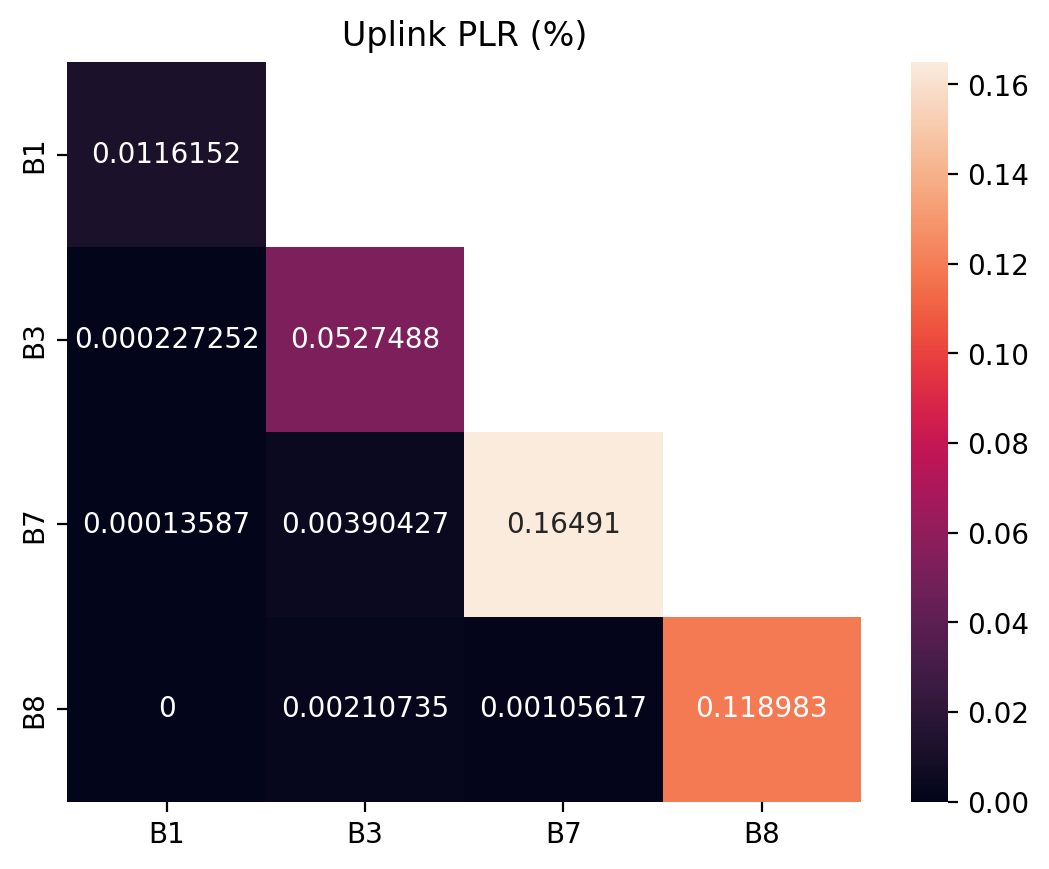

In [34]:
N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title('Uplink PLR (%)')
plt.show()

20


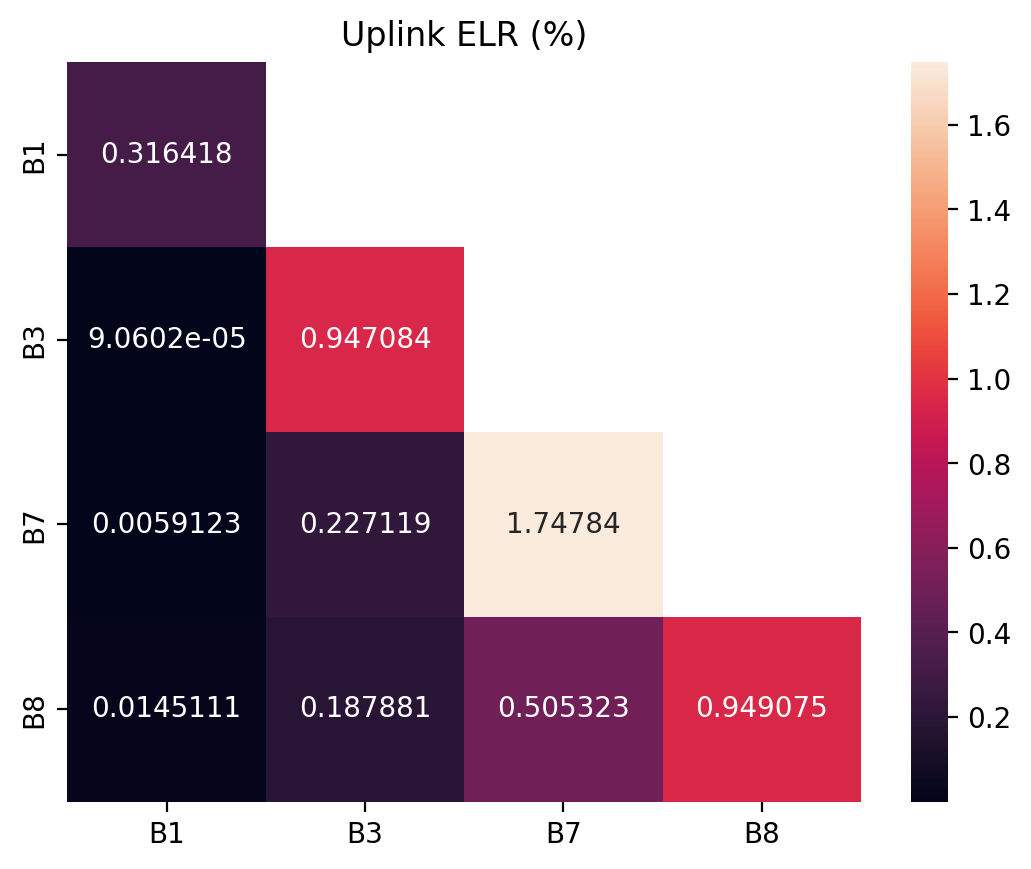

In [35]:
N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                ELR = df[~df.lost].excl.mean() * 100
            else:
                ELR = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                ELR = (df[~df.lost_m].excl_m & df[~df.lost_m].excl_s).mean() * 100
            else:
                ELR = np.nan
        row.append(ELR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title('Uplink ELR (%)')
plt.show()

20


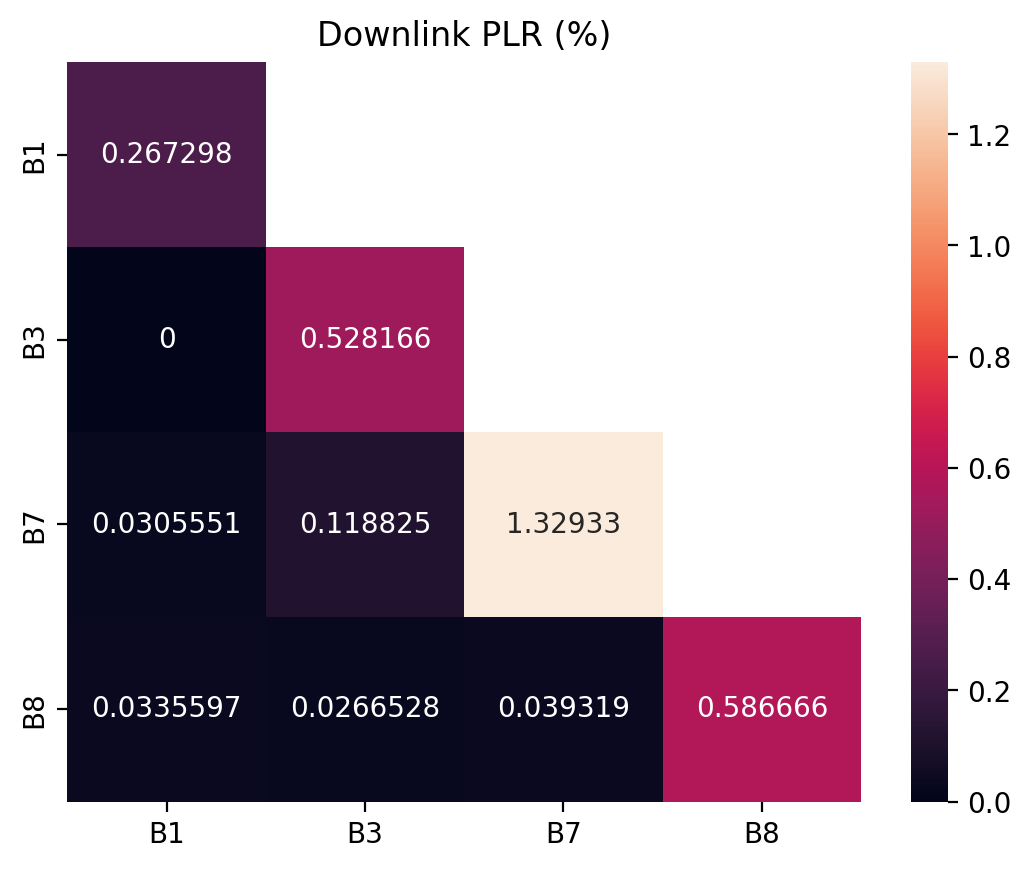

In [36]:
N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                PLR = df.lost.mean() * 100
            else:
                PLR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                PLR = (df.lost_m & df.lost_s).mean() * 100
            else:
                PLR = np.nan
        row.append(PLR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title('Downlink PLR (%)')
plt.show()

In [1]:
N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                ELR = df[~df.lost].excl.mean() * 100
            else:
                ELR = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                ELR = (df[~(df.lost_m & df.lost_s)].excl_m & df[~(df.lost_m & df.lost_s)].excl_s).mean() * 100
            else:
                ELR = np.nan
        row.append(ELR)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title('Downlink ELR (%)')
plt.show()

NameError: name 'dfs_dl' is not defined

### Latency & Jitter

In [38]:
df = pd.merge(dfs_ul[5][0].copy(), dfs_ul[5][1].copy(), on=['seq'], suffixes=('_m','_s')).copy()
# print(df.latency_m)
print(df.latency_m.mean())
print(df[~df.lost_m].latency_m.mean())

# print(df.latency_s)
print(df.latency_s.mean())
print(df[~df.lost_s].latency_s.mean())

df['latency_ms'] = df[['latency_m', 'latency_s']].values.min(axis=1)
# print(df.latency_ms)
print(df.latency_ms.mean())
print(df[~(df.lost_m & df.lost_s)].latency_ms.mean())

inf
0.016333368
inf
0.027406365
0.008369863
0.008369863


In [39]:
xs = list(it.combinations(schemes, 2))
tags = ['+'.join([s[0], s[1]]) for s in xs]

xs = list(it.combinations(range(len(schemes)), 2))

print(xs)
print(tags)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['B1+B3', 'B1+B7', 'B1+B8', 'B3+B7', 'B3+B8', 'B7+B8']


In [40]:
N = len(dfs_ul)
print(N)

table = []
for i in range(N):
# for i in range(1, 5):
    row = []
    for x, tag in zip(xs, tags):
        if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
            df_ul = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
            df_ul['latency_ms'] = df_ul[['latency_m', 'latency_s']].values.min(axis=1)
            avg_l_ul = round(df_ul[~(df_ul.lost_m & df_ul.lost_s)].latency_ms.mean(), 6)
            std_l_ul = round(df_ul[~(df_ul.lost_m & df_ul.lost_s)].latency_ms.std(), 6)
            jitter_ul = round(df_ul.loc[~(df_ul.lost_m & df_ul.lost_s), 'latency_ms'].diff().abs().mean(), 6)
        else:
            avg_l_ul, std_l_ul, jitter_ul = np.nan, np.nan, np.nan
        if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
            df_dl = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
            df_dl['latency_ms'] = df_dl[['latency_m', 'latency_s']].values.min(axis=1)
            avg_l_dl = round(df_dl[~(df_dl.lost_m & df_dl.lost_s)].latency_ms.mean(), 6)
            std_l_dl = round(df_dl[~(df_dl.lost_m & df_dl.lost_s)].latency_ms.std(), 6)
            jitter_dl = round(df_dl.loc[~(df_dl.lost_m & df_dl.lost_s), 'latency_ms'].diff().abs().mean(), 6)
        else:
            avg_l_dl, std_l_dl, jitter_dl = np.nan, np.nan, np.nan
        row = [*row, avg_l_ul, std_l_ul, jitter_ul, avg_l_dl, std_l_dl, jitter_dl]
    table.append(row)

header = []
for x, tag in zip(xs, tags):
    header = [*header, f'ul_avg_L_{tag}', f'ul_std_L_{tag}', f'ul_jitter_{tag}', f'dl_avg_L_{tag}', f'dl_std_L_{tag}', f'dl_jitter_{tag}']
average = [round(s[1], 6) if i%3 == 1 else round(s[0], 6) for i, s in enumerate(zip(np.nanmean(table, axis=0), nanrms(table, axis=0)))]
with open("stats_latency_dr.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(table)
    writer.writerow(average)

print('Latency & Jitter')
x = PrettyTable()
x.field_names = ['No.', *header]
x.add_rows([[i+1, *row] for i, row in enumerate(table)])
x.add_row(['average', *average])
x.align = 'r'
x.align['No.'] = 'c'
print(x)

20
Latency & Jitter
+---------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+-----------------+
|   No.   | ul_avg_L_B1+B3 | ul_std_L_B1+B3 | ul_jitter_B1+B3 | dl_avg_L_B1+B3 | dl_std_L_B1+B3 | dl_jitter_B1+B3 | ul_avg_L_B1+B7 | ul_std_L_B1+B7 | ul_jitter_B1+B7 | dl_avg_L_B1+B7 | dl_std_L_B1+B7 | dl_jitter_B1+B7 | ul_avg_L_B1+B8 | ul_std_L_B1+B8 | ul_jitter_B1+B8 | dl_avg_L_B1+B8 | dl_std_L_B1+B8 | dl_jitter_B1+B8 | ul_avg_L_B3+B7 | ul_

#### heatmap

In [41]:
xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) if s[0] != s[1] else s[0] for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

xs = list(it.combinations(schemes, 2))
tags = [*schemes, *['+'.join([s[0], s[1]]) for s in xs]]

xs = list(it.combinations(range(len(schemes)), 2))
xs = [*list(range(len(schemes))), *xs]

print(xs)
print(tags)
display(pd.DataFrame(mtags))

[0, 1, 2, 3, (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['B1', 'B3', 'B7', 'B8', 'B1+B3', 'B1+B7', 'B1+B8', 'B3+B7', 'B3+B8', 'B7+B8']


,0,1,2,3
0,B1,B1+B3,B1+B7,B1+B8
1,0,B3,B3+B7,B3+B8
2,0,0,B7,B7+B8
3,0,0,0,B8


20


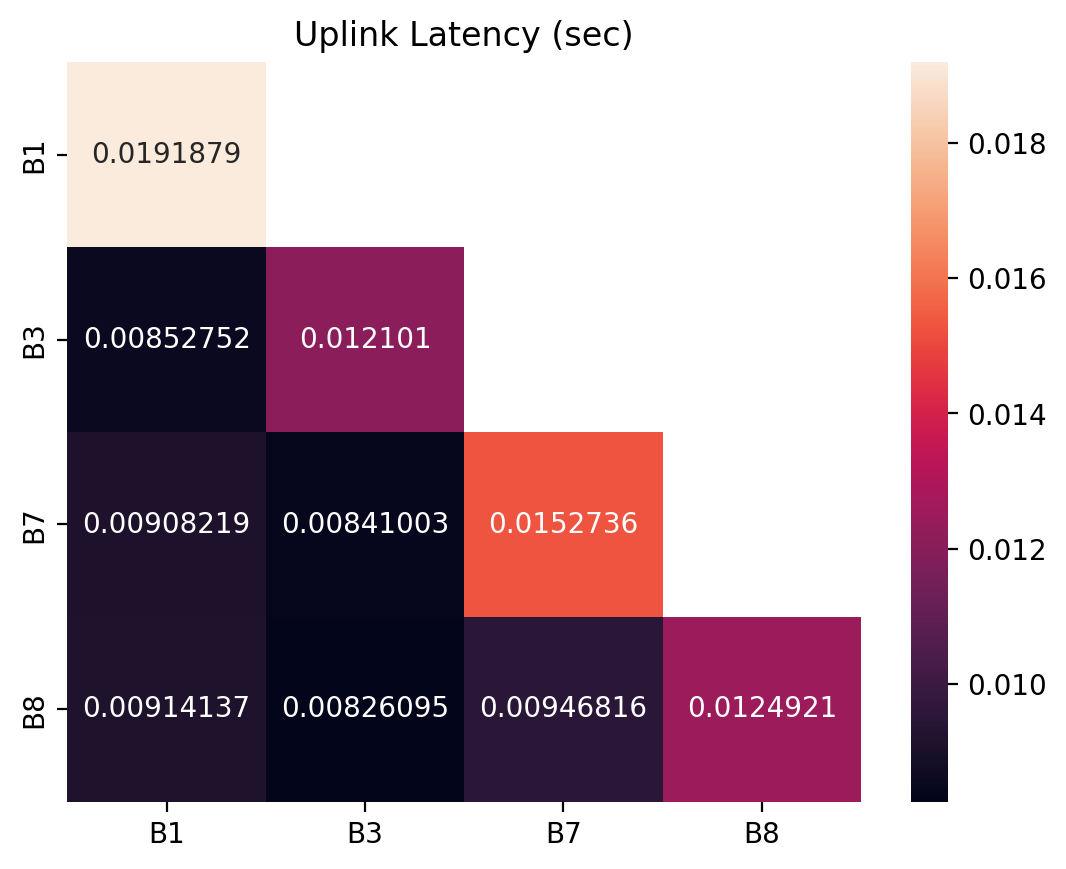

In [42]:
N = len(dfs_ul)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_ul[i][x].empty:
                df = dfs_ul[i][x].copy()
                lat = df[~df.lost].latency.mean()
            else:
                lat = np.nan
        else:
            if not (dfs_ul[i][x[0]].empty or dfs_ul[i][x[1]].empty):
                df = pd.merge(dfs_ul[i][x[0]].copy(), dfs_ul[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                df['latency_ms'] = df[['latency_m', 'latency_s']].values.min(axis=1)
                lat = df[~(df.lost_m & df.lost_s)].latency_ms.mean()
            else:
                lat = np.nan
        row.append(lat)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title('Uplink Latency (sec)')
plt.show()

20


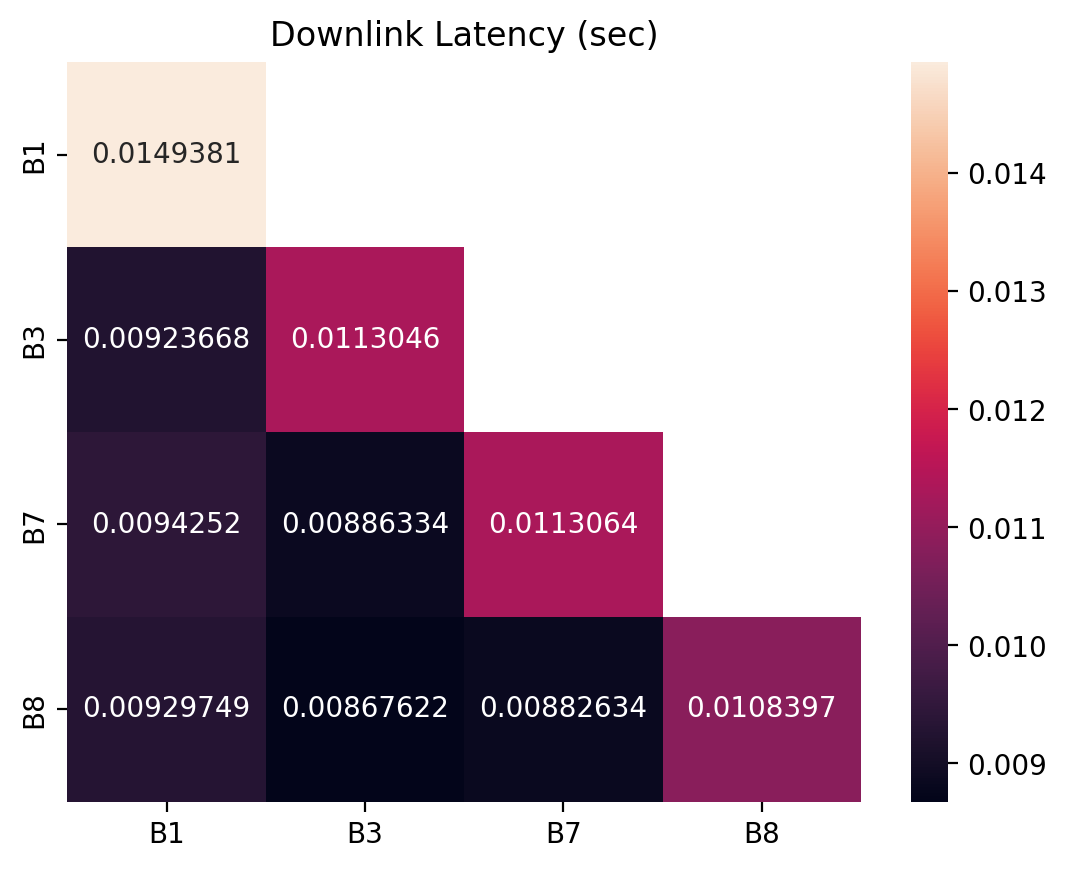

In [43]:
N = len(dfs_dl)
print(N)

table = pd.DataFrame(columns=tags)
for i in range(N):
# for i in range(5, 6):
    row = []
    for x, tag in zip(xs, tags):
        if type(x) is not tuple:
            if not dfs_dl[i][x].empty:
                df = dfs_dl[i][x].copy()
                lat = df[~df.lost].latency.mean()
            else:
                lat = np.nan
        else:
            if not (dfs_dl[i][x[0]].empty or dfs_dl[i][x[1]].empty):
                df = pd.merge(dfs_dl[i][x[0]].copy(), dfs_dl[i][x[1]].copy(), on=['seq'], suffixes=('_m','_s')).copy()
                df['latency_ms'] = df[['latency_m', 'latency_s']].values.min(axis=1)
                lat = df[~(df.lost_m & df.lost_s)].latency_ms.mean()
            else:
                lat = np.nan
        row.append(lat)
    table = pd.concat([table, pd.DataFrame(row, index=table.columns).T])

mat = fill_out_matrix(schemes, mtags, table.mean().to_dict())
ax = sns.heatmap(mat.T, annot=True, fmt='.6g', mask=mask(len(schemes)))
ax.set_title('Downlink Latency (sec)')
plt.show()